## Finance Fundamentals
- Portfolio Allocation
- Sharpe Ratio
- Portfolio Optimization
- Efficient Frontier
- CAPM - Capital Asset Pricing Model

Portfolio is just a set of allocations in a variety of securities

- Daily Returns
- Cumulative Return
- Avg. Daily Return
- Std. Daily Return

### Sharpe Ratio
The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.

It was developed by Nobel laureate William F. Sharpe, and it is used to help investors understand the return of an investment compared to its risk. 

#### What is risk free return?
The return you would receive if you put your money in an investment such as a bank savings account, LIBOR, Treasury Bonds that are essentially "risk-free"

For now, assuming Rf is 0, we get:
- SR = Mean Return / Std. Dev

The annualized Sharpe Ratio can be obtained by multiplying against a K-Factor based off Sampling Rate:
- Daily: K = sqrt(252)
- Weekly: K = sqrt(52)
- Monthly: K = sqrt(12)

ASR = K * SR

In [1]:
import pandas as pd
import numpy as np
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2018-01-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [4]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [5]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [6]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [7]:
amzn.tail()

,Adj. Close,Normed Return
Date,,
2017-12-22,1168.36,6.526057
2017-12-26,1176.76,6.572977
2017-12-27,1182.26,6.603698
2017-12-28,1186.10,6.625147
2017-12-29,1169.47,6.532257


In [8]:
# 30% in apple, 20% in cisco, 40% in amazon, 10% in ibm
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [9]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [10]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [11]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],
               ibm['Position Values'],amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis=1)
portfolio_val.columns = ['AAPL Position','CISCO Position','IBM Position','AMZN Position']
portfolio_val.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [12]:
portfolio_val['Total Position'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

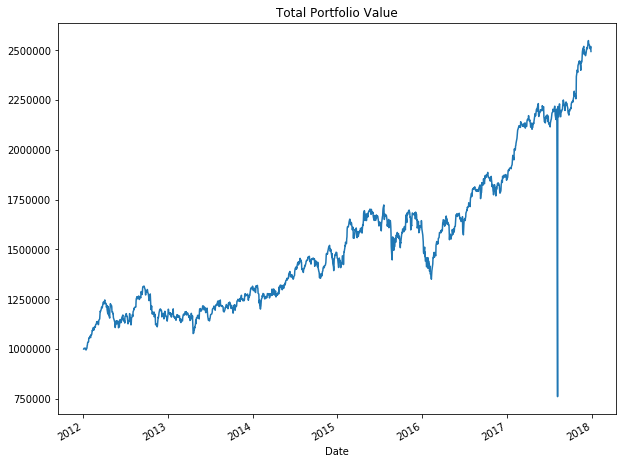

In [14]:
portfolio_val['Total Position'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

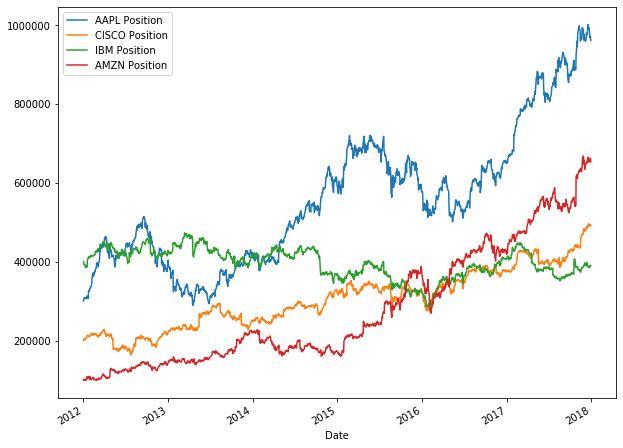

In [15]:
portfolio_val.drop('Total Position',axis=1).plot(figsize=(10,8))

### Portfolio Stats

In [16]:
portfolio_val['Daily Return'] = portfolio_val['Total Position'].pct_change(1)
portfolio_val.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position,Total Position,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [17]:
portfolio_val['Daily Return'].mean()

0.0014882681085789742

In [18]:
portfolio_val['Daily Return'].std()

0.0530608649284263

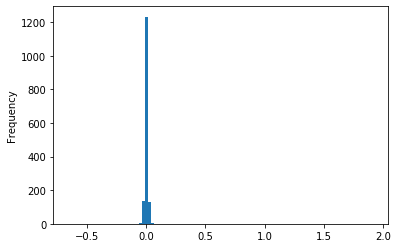

In [19]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100)

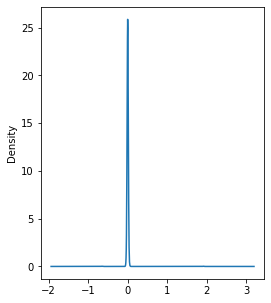

In [20]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5))

In [21]:
cumulative_return = 100 * (portfolio_val['Total Position'][-1]/portfolio_val['Total Position'][0] - 1)
cumulative_return

149.37969211313438

In [22]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
SR # Sharpe Ratio, the greater the better

0.028048319803804483

In [23]:
ASR = (252**0.5) * SR   
ASR # Annualized Shapre Ratio

0.4452532733644478

## Portfolio Optimization
“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

Evaluate Portfolio Allocations against each other

How to optimize the portfolio holdings?

### Monte Carlo Simulation for Optimization Search
We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

Randomly assign a weight to each security in our portfolio, then calculate its mean daily return and std. dev. of daily return

Use math to figure out the optimal Sharpe Ratio for any given portfolio

*We want to actually maximize the Sharpe Ratio, meaning we can create an optimizer that will attempt to minimize the negative Sharpe Ratio!*

We'll use SciPy's built-in optimization algorithms to calculate the optimal weight allocation for portfolio (optimized by Sharpe Ratio)

In [24]:
stocks.tail()

,aapl,cisco,ibm,amzn
Date,,,,
2017-12-22,175.01,38.55,152.50,1168.36
2017-12-26,170.57,38.48,152.83,1176.76
2017-12-27,170.60,38.56,153.13,1182.26
2017-12-28,171.08,38.59,154.04,1186.10
2017-12-29,169.23,38.30,153.42,1169.47


In [25]:
stocks.pct_change(1).mean()

aapl     0.000896
cisco    0.000689
ibm      0.000048
amzn     0.001417
dtype: float64

In [26]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.293079,0.266077,0.258352
cisco,0.293079,1.000000,0.396285,0.273201
ibm,0.266077,0.396285,1.000000,0.232009
amzn,0.258352,0.273201,0.232009,1.000000


### Log Returns vs Arithmetic Returns
Now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same, but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that. Log returns are convenient to work with in many of the algorithms.

In [27]:
log_return = np.log(stocks/stocks.shift(1))
log_return.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


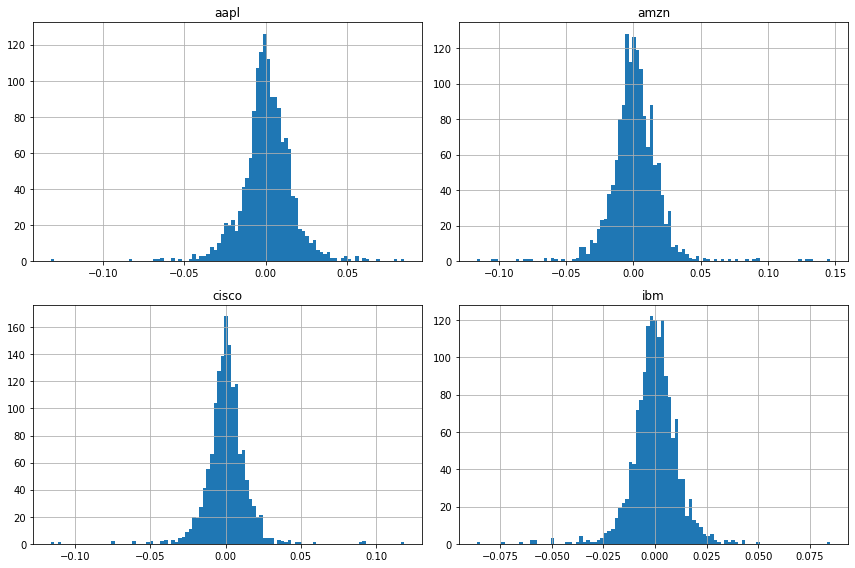

In [28]:
log_return.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [29]:
log_return.mean()

aapl     0.000758
cisco    0.000595
ibm     -0.000018
amzn     0.001245
dtype: float64

In [30]:
log_return.cov() * 252 # multiply by days

,aapl,cisco,ibm,amzn
aapl,0.062167,0.015858,0.012059,0.018948
cisco,0.015858,0.047004,0.015681,0.017502
ibm,0.012059,0.015681,0.033375,0.012499
amzn,0.018948,0.017502,0.012499,0.085875


In [31]:
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights/np.sum(weights)
print(weights)
print('\n')

# Expected Return
print("Expected Portfolio Return:")
expected_return = np.sum((log_return.mean() * weights) * 252)
print(expected_return)
print('\n')

# Expected Volatility
print("Expected Volatility:")
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
print(expected_volatility)
print('\n')

# Sharpe Ratio
print('Sharpe Ratio:')
SR = expected_return / expected_volatility
print(SR)

Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return:
0.184860641368843


Expected Volatility:
0.1764141915165996


Sharpe Ratio:
1.0478785169131286


In [32]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
return_arr = np.zeros(num_ports)
volatility_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    # Create Random Weights
    weights = np.array(np.random.random(4))
    
    # Rebalance Weights
    weights = weights/np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    return_arr[ind] = np.sum((log_return.mean() * weights) * 252)

    # Expected Volatility
    volatility_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = return_arr[ind] / volatility_arr[ind]

In [33]:
sharpe_arr.max()

1.218773900052946

In [34]:
sharpe_arr.argmax()

4487

In [35]:
all_weights[4487,:] # optimized portfolio allocation

array([0.30378263, 0.19922772, 0.00456591, 0.49242375])

In [36]:
max_sr_return = return_arr[4487]
max_sr_volatility = volatility_arr[4487]

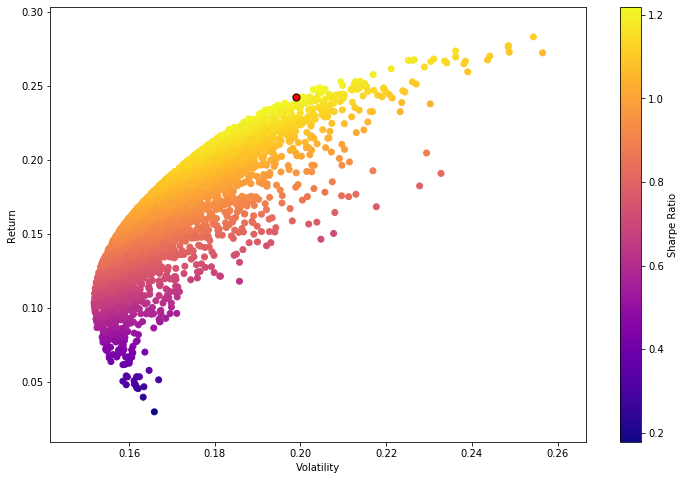

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_arr,return_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Plot max sharpe ratio, add red dot for max SR
plt.scatter(max_sr_volatility,max_sr_return,c='red',s=50,edgecolors='black')

## Mathematical Optimization
There are much better ways to find good allocation weights than just guess and check

Use optimization functions to find the ideal weights mathematically!

### Functionalize Return and SR operations

In [38]:
def get_return_volatility_sharperatio(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])

**Optimization works as a minimization function**, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [39]:
from scipy.optimize import minimize

In [40]:
def neg_sharpe(weights):
    return get_return_volatility_sharperatio(weights)[2] * -1

In [41]:
# Contraints
def check_sum(weights):
    # return 0 if the sum of the weights is 1
    return np.sum(weights) - 1

In [42]:
# By convention of minimize function it should be a function that returns zero for conditions
constraint = ({'type':'eq','fun':check_sum})

# 0-1 bounds for each weight
bound = ((0,1),(0,1),(0,1),(0,1))

# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [43]:
# Sequential Least SQuares Programming (SLSQP)
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds = bound, constraints = constraint)
opt_results 

     fun: -1.2219078893428015
     jac: array([-8.02874565e-05, -8.84830952e-05,  4.40450326e-01,  9.31173563e-05])
 message: 'Optimization terminated successfully'
    nfev: 31
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([2.87349949e-01, 2.38302166e-01, 2.16863446e-17, 4.74347885e-01])

In [44]:
get_return_volatility_sharperatio(opt_results.x) # return optimal results: daily return, volatility, sharpe ratio

array([0.23950254, 0.19600704, 1.22190789])

### All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 

Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

http://www.investopedia.com/terms/e/efficientfrontier

In [45]:
# check all optimal portfolios
frontier_y = np.linspace(0,0.3,100)

In [46]:
def minimize_volatility(weights):
    return get_return_volatility_sharperatio(weights)[1]

In [47]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq', 'fun':check_sum},
           {'type':'eq', 'fun':lambda w: get_return_volatility_sharperatio(w)[0] - possible_return})
    
    result = minimize(minimize_volatility, init_guess, method='SLSQP',bounds=bound, constraints=cons)
    
    frontier_volatility.append(result['fun'])

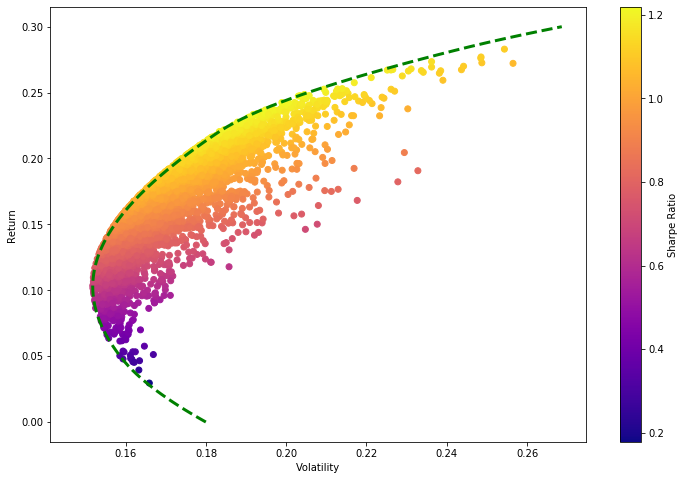

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_arr,return_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# plot a (optimization) line of efficient frontier
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

- Types of Funds
- Order Books
- Latency Arbitrage (HFT)
- Short Selling

### Three major fund types
- ETF: Exchange Traded Funds, most common ETFs is the Spider (SPY) which tracks the S&P500
- Mutual Funds
- Hedge Funds

### Capital Assets Pricing Model (CAPM) 
CAPM is one of the most fundamental topics in investing. It's a model that helps describe risk and separating market return versus your portfolio return.

There are two terms, the Beta term and the Alpha term.

The CAPM equation describes the return of some individual stock i. Comprised of two terms, Beta and Alpha.

- The Beta term implies that the return of a stock is equivalent to the return of the market multiplied by this Beta factor plus some residual alpha term

With CAPM stating that alpha should be expected to be zero, it basically implies that you cannot beat the general market! CAPM also says that alpha is random and cannot be predicted.

Beta term: some relationship between portfolio return and the overall market return

### Stock Splits and Dividends
Stock splits usually occur if the price for an individual stock becomes unreasonably high, so companies essentially just create a ratio split

Often stocks also pay dividends, for each unit of stock, each shareholder receives some payout. This causes the price to jump before the dividend announcement, and then drop after the dividend is paid out. The adjusted close price also takes this into account. It is important to always use adjusted close prices, otherweise you may be affected by stock splits and dividends in pricing strategies.

**Survivorship Bias**: If we take a look at the S&P500 benchmark today, it is a different set of companies than in the year 1999 (the peak of the dot-com bubble)

### Efficient Market Hypothesis (EMH)
EMH is an investment theory that states it is impossible to "beat the market" because stock market efficiency causes existing share prices to always incorporate and reflect all relevant information

According to the EMH, stocks always trade at their fair value on stock exchanges, making it impossible for investors to either purchase undervalued stocks or sell stocks for inflated prices.

In [49]:
from scipy import stats

In [50]:
import pandas_datareader as web

In [51]:
spy_etf = web.DataReader('SPY','yahoo')
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-22,327.200012,324.500000,324.619995,326.859985,57792900.0,326.859985
2020-07-23,327.230011,321.480011,326.470001,322.959991,75738000.0,322.959991
2020-07-24,321.989990,319.250000,320.950012,320.880005,73766600.0,320.880005
2020-07-27,323.410004,320.769989,321.630005,323.220001,48293000.0,323.220001
2020-07-28,323.640015,320.850006,322.429993,321.170013,57412300.0,321.170013


In [73]:
start = pd.to_datetime('2015-07-30')
end = pd.to_datetime('2020-07-28')

In [74]:
aapl = web.DataReader('AAPL','yahoo',start,end)
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-30,122.570000,121.709999,122.320000,122.370003,33628300.0,112.777275
2015-07-31,122.639999,120.910004,122.599998,121.300003,42885000.0,111.791130
2015-08-03,122.570000,117.519997,121.500000,118.440002,69976000.0,109.155342
2015-08-04,117.699997,113.250000,117.419998,114.639999,124138600.0,105.653229
2015-08-05,117.440002,112.099998,112.949997,115.400002,99312600.0,106.353653


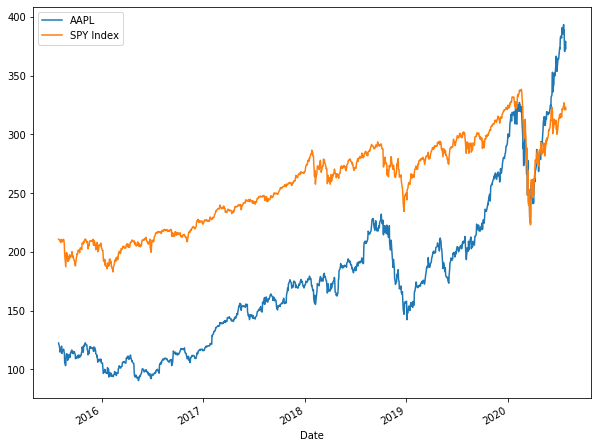

In [75]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [76]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

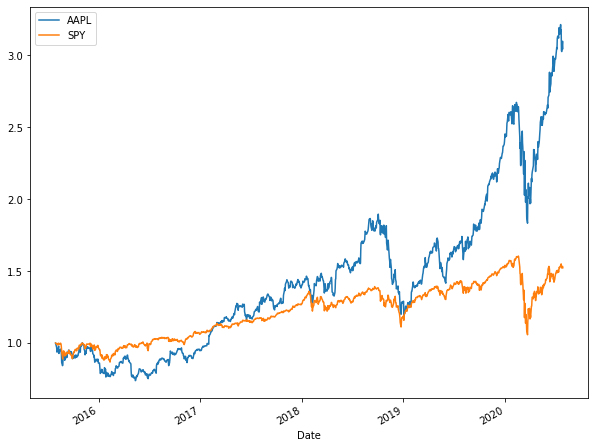

In [77]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [78]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

In [90]:
aapl['Daily Return'].tail()

Date
2020-07-22    0.002809
2020-07-23   -0.045516
2020-07-24   -0.002477
2020-07-27    0.023700
2020-07-28   -0.016428
Name: Daily Return, dtype: float64

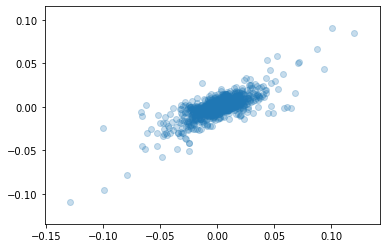

In [80]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25)

In [81]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:],
                                                         spy_etf['Daily Return'].iloc[1:])

In [82]:
beta

0.5041908895071705

In [83]:
alpha

-0.00012374898516176924

In [84]:
spy_etf['Daily Return'].head()

Date
2015-07-30         NaN
2015-07-31   -0.001518
2015-08-03   -0.003373
2015-08-04   -0.001954
2015-08-05    0.003295
Name: Daily Return, dtype: float64

In [85]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))
noise

array([ 0.00092202,  0.00099047, -0.00140432, ...,  0.00011078,
       -0.00099734,  0.00120221])

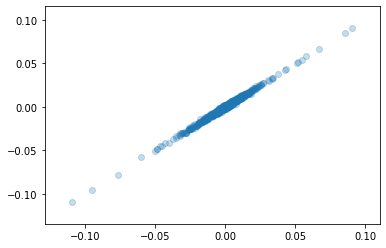

In [86]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)

In [87]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock,
                                                         spy_etf['Daily Return'].iloc[1:])

In [88]:
beta

0.9943779249456937

In [89]:
alpha

4.546202026557559e-06